In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import scipy

from processing_functions import *

np.set_printoptions(precision=4)

## Load results and compute the expectation values and standard deviation

In [2]:
raw_expval = []
zne_expval = []
raw_stds = []
zne_stds = []

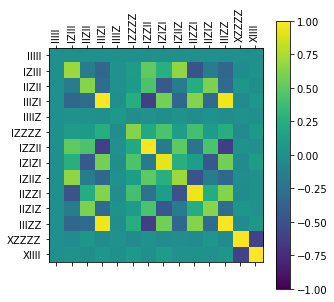

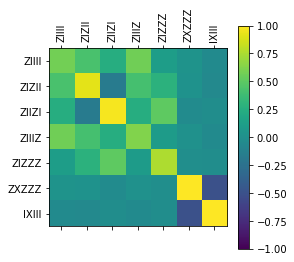

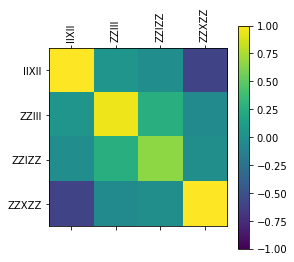

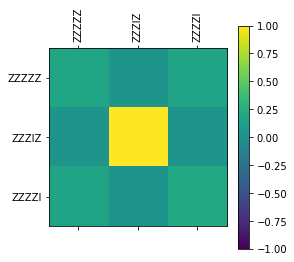

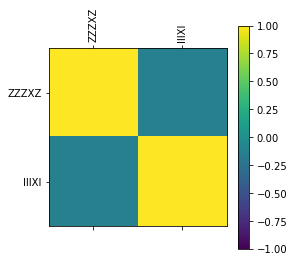

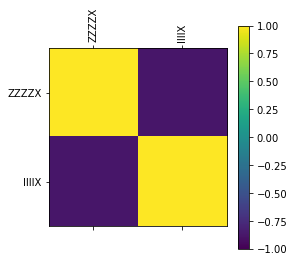

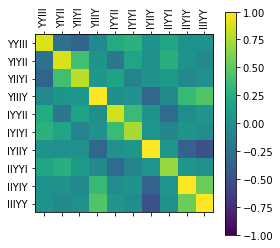

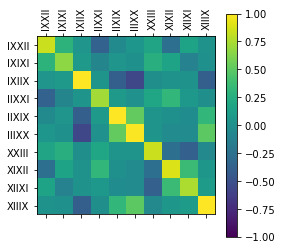

In [3]:
# Set show_plots=True to plot the covariance matrices.
from raw_results_o18 import H_tapered, job_results
expval, std = compute_expal_and_std(H_tapered, job_results, shots=1000, show_plots=True)

raw_expval.append(expval)
zne_expval.append(expval)
raw_stds.append(std)
zne_stds.append(std)

In [4]:
from raw_results_o20 import H_tapered, job_results
expval, std = compute_expal_and_std(H_tapered, job_results)

raw_expval.append(expval)
raw_stds.append(std)

In [5]:
from raw_results_o20_zne import H_tapered, job_results
expval, std = compute_expal_and_std(H_tapered, job_results)

zne_expval.append(expval)
zne_stds.append(std)

In [6]:
from raw_results_o22 import H_tapered, job_results
expval, std = compute_expal_and_std(H_tapered, job_results)

raw_expval.append(expval)
raw_stds.append(std)

In [7]:
from raw_results_o22_zne import H_tapered, job_results
expval, std = compute_expal_and_std(H_tapered, job_results)

zne_expval.append(expval)
zne_stds.append(std)

In [8]:
from raw_results_o24 import H_tapered, job_results
expval, std = compute_expal_and_std(H_tapered, job_results)

raw_expval.append(expval)
raw_stds.append(std)

In [9]:
from raw_results_o24_zne import H_tapered, job_results
expval, std = compute_expal_and_std(H_tapered, job_results)

zne_expval.append(expval)
zne_stds.append(std)

In [10]:
from raw_results_o26 import H_tapered, job_results
expval, std = compute_expal_and_std(H_tapered, job_results)

raw_expval.append(expval)
zne_expval.append(expval)
raw_stds.append(std)
zne_stds.append(std)

In [11]:
raw_expval, raw_stds

([-10.545733769999998,
  -18.04132734,
  -25.537360070000005,
  -35.83008087999999,
  -38.546713589999996],
 [tensor(7.2081, requires_grad=True),
  tensor(11.3336, requires_grad=True),
  tensor(11.694, requires_grad=True),
  tensor(10.9334, requires_grad=True),
  tensor(7.3549, requires_grad=True)])

In [12]:
zne_expval, zne_stds

([-10.545733769999998,
  -15.08974157,
  -19.388130160000003,
  -23.488743019999998,
  -38.546713589999996],
 [tensor(7.2081, requires_grad=True),
  tensor(12.4835, requires_grad=True),
  tensor(14.0328, requires_grad=True),
  tensor(13.5581, requires_grad=True),
  tensor(7.3549, requires_grad=True)])

## Plot results

In [11]:
ideal_energies = np.array([-10.853163, -21.4836622, -32.722017, -43.905568, -40.1021559])

hw_energies = np.zeros((5, 2))
hw_energies[:,0] = raw_expval
hw_energies[:,1] = zne_expval

raw_stds = qml.math.squeeze(raw_stds)
zne_stds = qml.math.squeeze(zne_stds)

In [12]:
# Compute the stdiance of the error-mitigation value; linear combination
extrapolated_stds = np.sqrt((9/4) * np.array(raw_stds) ** 2 + (1/4) * np.array(zne_stds) ** 2)

# Replace the original values because we didn't do mitigation for them
extrapolated_stds[0] = raw_stds[0]
extrapolated_stds[-1] = raw_stds[-1]

In [13]:
raw_stds

array([ 7.2081, 11.3336, 11.694 , 10.9334,  7.3549])

In [14]:
# From the circuits with one fold
zne_stds 

array([ 7.2081, 12.4835, 14.0328, 13.5581,  7.3549])

In [15]:
extrapolated_stds

array([ 7.2081, 18.1101, 18.8923, 17.746 ,  7.3549])

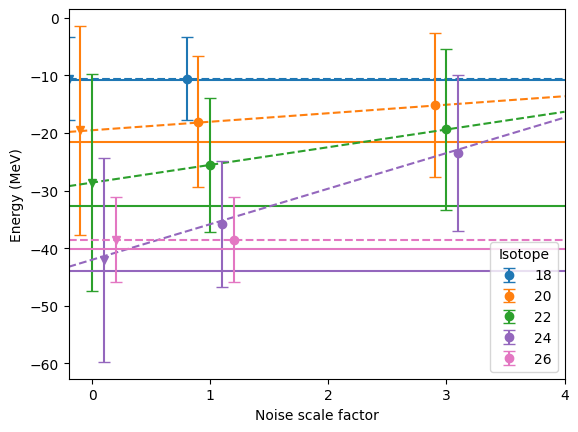

In [16]:
isotopes = [18, 20, 22, 24, 26]
colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:pink']
zne_values = []
folds = np.array([1, 3])
offsets = [-0.2, -0.1, 0, 0.1, 0.2]
fold_values = np.linspace(-0.2, 4, 100)

for idx, isotope in enumerate(isotopes):
    # Plot the HW values

    if isotope not in [18, 26]:
        plt.errorbar(folds+offsets[idx], hw_energies[idx], yerr=[raw_stds[idx], zne_stds[idx]], 
                     fmt="o", capsize=4, label=isotope, c=colours[idx])

        # Compute the fit and plot the line and the intercept
        res = scipy.stats.linregress(folds, hw_energies[idx])
        plt.errorbar([0+offsets[idx]], [res.intercept], yerr=extrapolated_stds[idx], fmt="v", capsize=4, c=colours[idx])
        plt.plot(
            fold_values, res.intercept + res.slope * fold_values, 
            c=colours[idx], linestyle="--"
        )
        zne_values.append(res.intercept)
    else:
        plt.errorbar([0+offsets[idx]], [hw_energies[idx][0]], yerr=raw_stds[idx], fmt="v", capsize=4, c=colours[idx])
        plt.errorbar([1+offsets[idx]], [hw_energies[idx][0]], yerr=raw_stds[idx], fmt="o", capsize=4, c=colours[idx], label=isotope)
        plt.axhline(y=hw_energies[idx][0], c=colours[idx], linestyle="--")
        zne_values.append(hw_energies[idx][0])
        
    plt.axhline(y=ideal_energies[idx], c=colours[idx])

plt.xticks([0, 1, 2, 3, 4])
plt.xlim(-0.2, 4)
plt.xlabel("Noise scale factor") 
plt.ylabel("Energy (MeV)")
plt.legend(title="Isotope")
#plt.title("Noise-extrapolated hardware results from IonQ device")        
#plt.savefig("aria-results-zne.pdf")

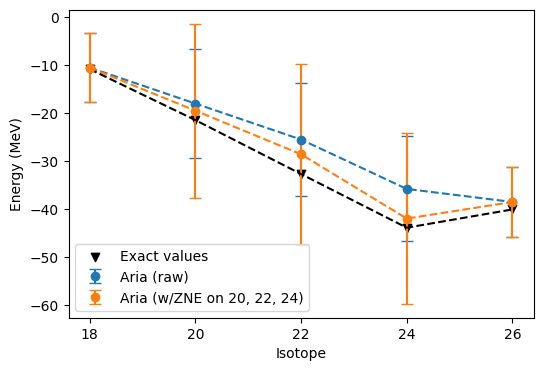

In [17]:
plt.figure(figsize=(6, 4))

plt.errorbar(isotopes, hw_energies[:, 0], yerr=raw_stds, capsize=4, fmt="o", 
             label="Aria (raw)", c="tab:blue")
plt.plot(isotopes, hw_energies[:, 0], linestyle="--", c="tab:blue")

plt.errorbar(isotopes, zne_values, yerr=extrapolated_stds, capsize=4, fmt="o", 
             label="Aria (w/ZNE on 20, 22, 24)", c="tab:orange")
plt.plot(isotopes, zne_values, linestyle="--", c="tab:orange")

plt.scatter(isotopes, ideal_energies, label="Exact values", c="black", marker="v")
plt.plot(isotopes, ideal_energies, linestyle="--", c="black")

plt.ylabel("Energy (MeV)")
plt.xlabel("Isotope")
plt.xticks(isotopes)
plt.legend()
#plt.title("Oxygen drip line evaluation")
#plt.savefig("hw-dripline-plot.pdf")